In [1]:
import numpy as np
import pandas as pd
import dame_flame
import matplotlib.pyplot as plt

# Generate Data
num_covariates = 10
df, true_catt = dame_flame.utils.data.gen_data_binx_decay_importance(num_control=1000, num_treated=1000, 
                    num_cov=num_covariates, bernoulli_param=0.5, bi_mean=2, bi_stdev=1)

# Get matches using DAME and FLAME
model_dame = dame_flame.matching.DAME(repeats=False, verbose=0, early_stop_iterations=10)
model_dame.fit(holdout_data=df)
result_dame = model_dame.predict(df)

model_flame = dame_flame.matching.FLAME(repeats=False, verbose=0, early_stop_iterations=10)
model_flame.fit(holdout_data=df)
result_flame = model_flame.predict(df)

1770 units matched. We stopped before doing iteration number:  10
0 units matched. We stopped before doing iteration number:  10


In [2]:
# replace all the '*'s with NAs so we can get a count of the NAs. 
result_flame = result_flame.replace(to_replace='*', value=np.nan)
result_dame = result_dame.replace(to_replace='*', value=np.nan)

# This will map: {number of covariates matched on : number of units matched on that number of covariates}
dict_matched_result_dame = {k:0 for k in range(0,num_covariates+1)}
dict_matched_result_flame = {k:0 for k in range(0,num_covariates+1)}

# iterate through the rows in the df and count the number of non-NaN values in the row to determine
# how many units that row was matched on. 
for i in result_flame.count(axis=1):
    dict_matched_result_flame[i] += 1
    
for i in result_dame.count(axis=1):
    dict_matched_result_dame[i] += 1

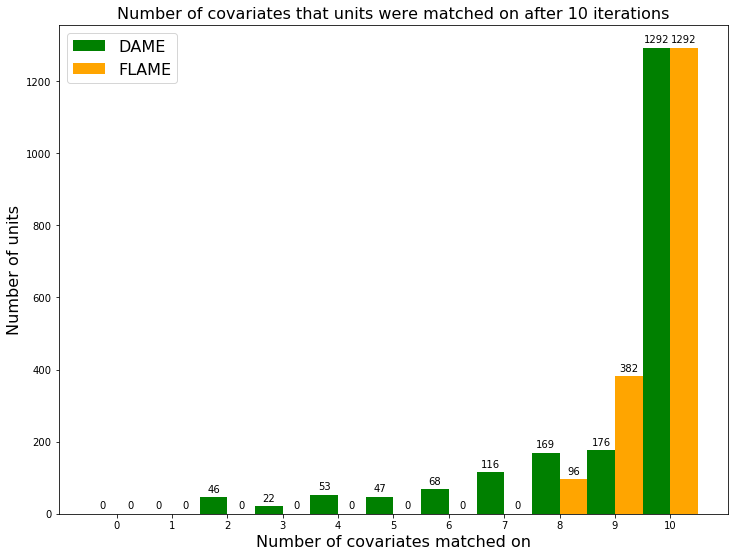

In [3]:
x = np.arange(len(dict_matched_result_flame.keys()))  # the label locations
width = 0.5  # the width of the bars

f, ax = plt.subplots(figsize=(12,9))
rects1 = ax.bar(x - width/2,  dict_matched_result_flame.values(), width, color="green", label = "DAME" ) #, stopping at {}% control units matched".format(percent), hatch="/")
rects2 = ax.bar(x + width/2, dict_matched_result_dame.values(), width, color = "orange", label = "FLAME") #, stopping at {}% control units matched".format(percent), hatch = "\\")
ax.set_ylabel('Number of units', fontsize=16)
ax.set_xlabel('Number of covariates matched on', fontsize=16)
ax.set_title('Number of covariates that units were matched on after 10 iterations',
            fontsize=16)

ax.set_xticks(x)
ax.set_xticklabels(dict_matched_result_flame.keys())
ax.legend(fontsize=16)

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

plt.show()

In [4]:
plt.savefig('flame_vs_dame_quality.png')

<Figure size 432x288 with 0 Axes>